<a href="https://colab.research.google.com/github/rahulakkasali/auto_outler_detection/blob/main/Outlayer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn

In [46]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv('/content/creditcard.csv')

In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
4511,3825,-0.478751,0.519722,1.993697,-1.017973,0.318557,-0.443785,0.467879,-0.079625,1.426345,...,-0.128191,-0.150504,-0.023670,-0.106755,-0.786751,-0.273968,-0.089095,-0.068476,4.12,0.0
3539,3023,1.011780,-0.958000,-0.615193,-0.567758,0.102298,0.761944,-0.045637,0.033160,-1.405189,...,-0.764134,-2.237542,-0.042051,-1.766736,0.033490,0.073368,-0.050731,0.028456,215.18,0.0
7963,10979,1.249706,-0.079696,0.824921,0.322643,-0.900948,-0.827550,-0.512295,-0.136281,1.906148,...,-0.082834,-0.031431,-0.008790,0.328556,0.177531,1.037839,-0.096713,0.003006,15.95,0.0
57,39,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0.0


In [5]:
df.shape

(13954, 31)

In [25]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


In [26]:
df = df.dropna()


In [28]:
normal_data=df[df.Class==0]
faurd_data=df[df.Class==1]
df.drop('Class',axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,24753,-0.565780,0.754977,0.737825,0.030154,-1.383391,0.268107,0.687564,0.228757,0.648610,...,-0.046313,-0.217212,-0.546207,0.358494,-0.016505,-0.793856,0.699716,-0.195727,-0.104007,232.00
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.001336,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,1.437054,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-2.982379,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00


In [29]:
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)

In [30]:
df_scaled

array([[-1.30773897, -0.65407714, -0.25585895, ..., -0.09068034,
         0.48199487, -0.0634795 ],
       [-1.30773897,  0.82997935, -0.01272395, ...,  0.04923522,
        -0.34400843, -0.0634795 ],
       [-1.30760975, -0.65323203, -1.16502362, ..., -0.24202139,
         1.76959981, -0.0634795 ],
       ...,
       [ 1.89127538, -0.06501305, -1.71245315, ...,  0.49924894,
         4.10566059, -0.0634795 ],
       [ 1.89166305, -3.38403313, -4.4996986 , ...,  9.80153152,
        -0.02182611, -0.0634795 ],
       [ 1.89166305,  0.81675603, -1.12541245, ...,  0.11705849,
         0.14682631, -0.0634795 ]])

In [31]:
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)


In [32]:
input_dim = X_train.shape[1]

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='linear')
])


In [33]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 31)             │         1,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=25,
    batch_size=256,

)


Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0112
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8751
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8166
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7455
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7061
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6444
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6303
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5760
Epoch 9/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5710
Epoch 10/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5647
Epoch 11/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5342
Epoch 12/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5089
Epoch 13/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5141
Epoch 14/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4861
Epoch 15/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4523
Epoch 16/25
44/44 ━

In [36]:
X_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_pred), axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
threshold = np.percentile(reconstruction_error, 95)
print("Reconstruction Threshold:", threshold)

Reconstruction Threshold: 0.9079651945632594


In [42]:
outliers = reconstruction_error > threshold
cleaned_data = X_test[~outliers]

In [53]:
print("Original test data size:", X_test.shape[0])
print("Cleaned data size:", cleaned_data.shape[0])
print("Number of outliers:", np.sum(outliers))


Original test data size: 2791
Cleaned data size: 2651
Number of outliers: 140


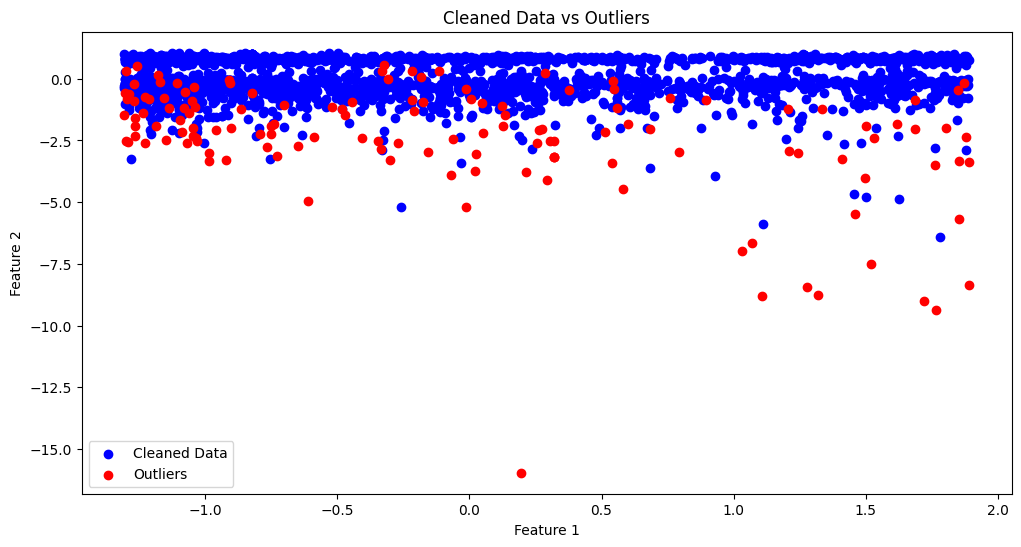

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], c='blue', label='Cleaned Data')
plt.scatter(X_test[outliers, 0], X_test[outliers, 1], c='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cleaned Data vs Outliers')
plt.legend()
plt.show()